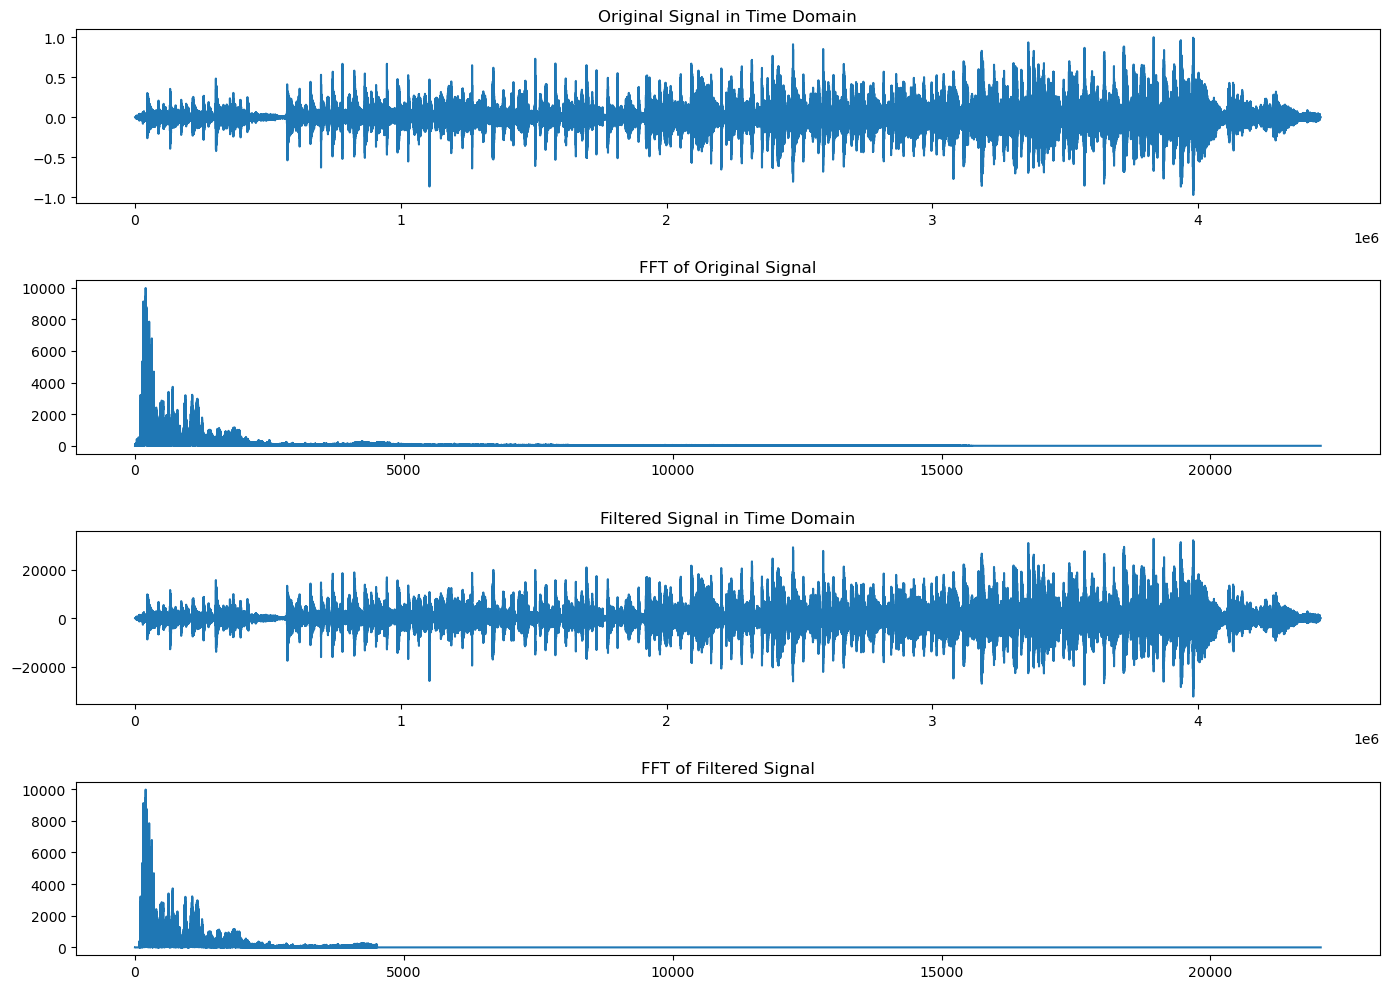

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from scipy.io import wavfile

input_file = 'input_audio.wav'
output_file = 'output_audio.wav'

sampling_rate, audio_signal = wavfile.read(input_file)

# If the audio is stereo, take one channel
if audio_signal.ndim > 1:
    audio_signal = audio_signal[:, 0]

# [-1, 1]로 정규화
audio_signal = audio_signal / np.max(np.abs(audio_signal))

# FFT
signal_fft = fft(audio_signal)

frequencies = np.fft.fftfreq(len(audio_signal), 1 / sampling_rate)

# Define the band-pass filter range (for human voice and guitar)
low_cutoff = 80  
high_cutoff = 4500
band_pass_filter = np.logical_and(np.abs(frequencies) >= low_cutoff, np.abs(frequencies) <= high_cutoff)
filtered_fft = signal_fft * band_pass_filter

filtered_signal = ifft(filtered_fft)
# Take the real part of the inverse FFT (the output is complex)
filtered_signal = np.real(filtered_signal)
# Normalize the filtered signal to the range [-32767, 32767] for 16-bit PCM format
filtered_signal = np.int16(filtered_signal / np.max(np.abs(filtered_signal)) * 32767)

wavfile.write(output_file, sampling_rate, filtered_signal)



plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(audio_signal)
plt.title('Original Signal in Time Domain')

plt.subplot(4, 1, 2)
plt.plot(frequencies[:len(frequencies) // 2], np.abs(signal_fft)[:len(frequencies) // 2])
plt.title('FFT of Original Signal')

plt.subplot(4, 1, 3)
plt.plot(filtered_signal)
plt.title('Filtered Signal in Time Domain')

filtered_signal_fft = fft(filtered_signal / 32767.0)  # [-1,1] 정규화
plt.subplot(4, 1, 4)
plt.plot(frequencies[:len(frequencies) // 2], np.abs(filtered_signal_fft)[:len(frequencies) // 2])
plt.title('FFT of Filtered Signal')

plt.tight_layout()
plt.show()

In [ ]:
print('hello')

hello


[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] (661794,)


Text(0.5, 1.0, 'Spectrogram (dB)')

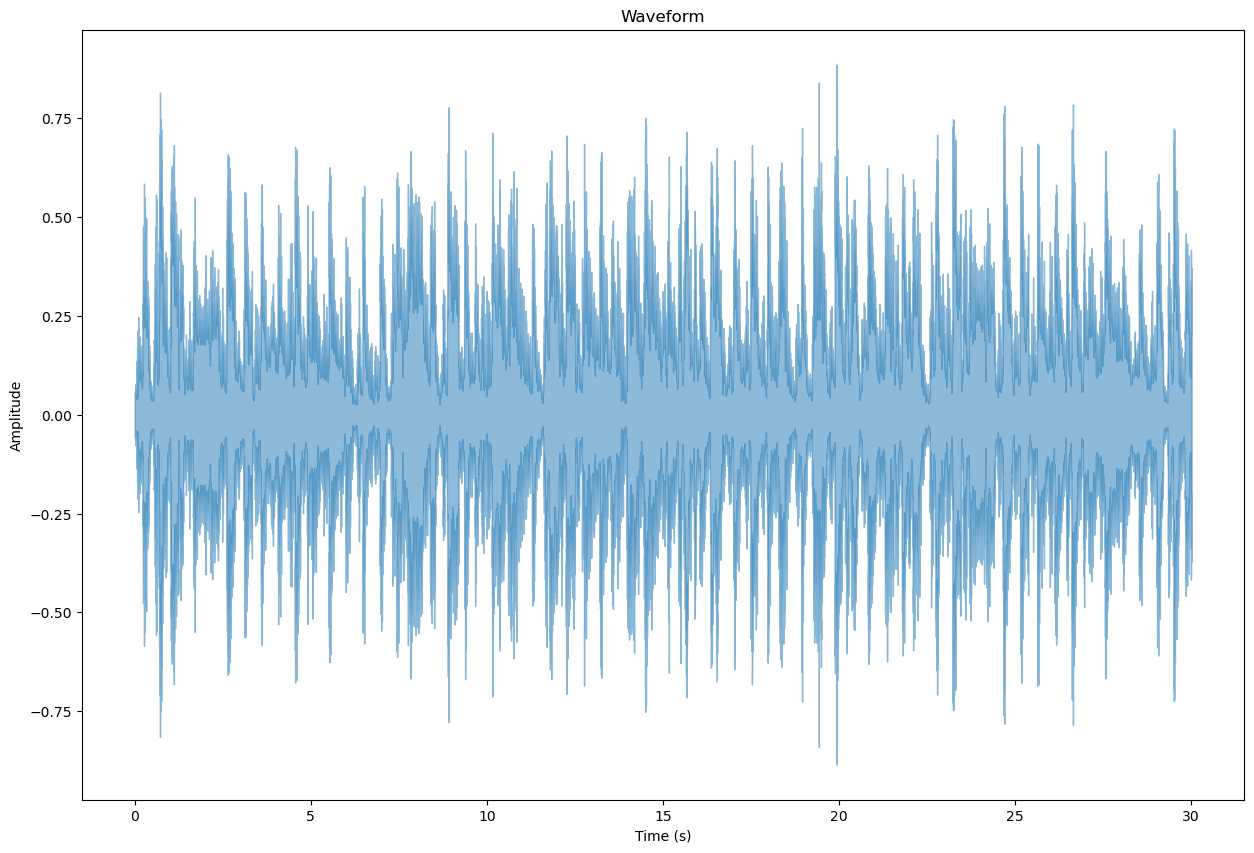

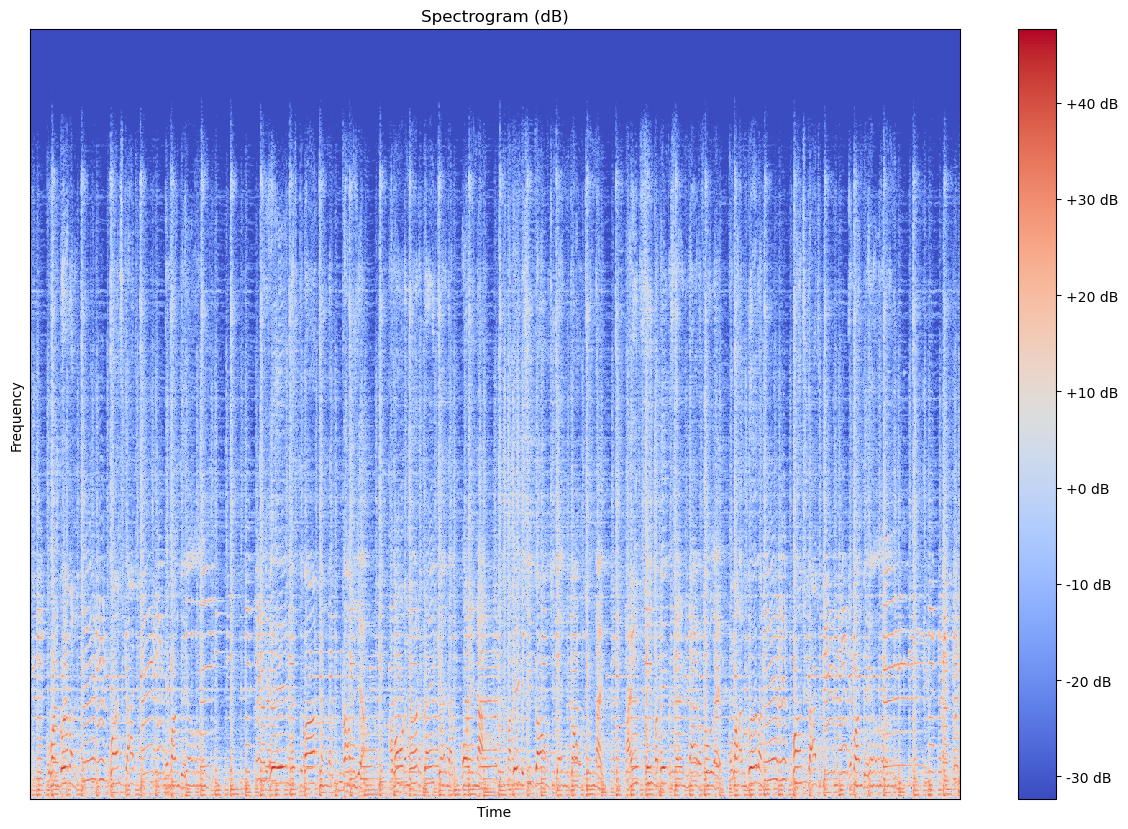

In [7]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
#from scipy.io import wavfile

FIG_SIZE = (15,10)

file = "blues.00000.wav"

# load audio file with Librosa
sig, sr = librosa.load(file, sr=22050)
#sr, sig = wavfile.read(file)

print(sig,sig.shape)

plt.figure(figsize=FIG_SIZE)
librosa.display.waveshow(sig, sr=sr, alpha=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


# STFT -> spectrogram
hop_length = 512  # 전체 frame 수
n_fft = 2048  # frame 하나당 sample 수

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

# STFT
stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

# 복소공간 값 절댓값 취하기
magnitude = np.abs(stft)

# magnitude > Decibels 
log_spectrogram = librosa.amplitude_to_db(magnitude)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

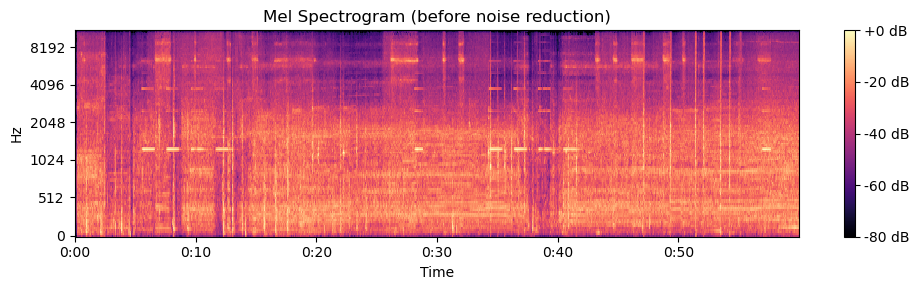

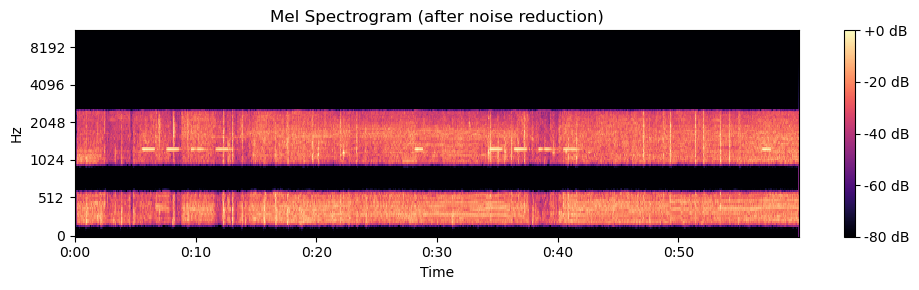

In [6]:
import numpy as np
import librosa, librosa.display 
import matplotlib.pyplot as plt
import soundfile as sf

audio_file = 'input_audio.wav'
sig, sr = librosa.load(audio_file)

mel_spectrogram_before = librosa.feature.melspectrogram(y=sig, sr=sr)

n_fft = 2048
hop_length = 512
spec = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

cutoff_high_freq = 2500
cutoff_low_freq = 200

min_freq = 600
max_freq = 1000

min_bin = int(min_freq*n_fft/sr)
max_bin = int(max_freq*n_fft/sr)
cutoff_high_bin = int(cutoff_high_freq * n_fft / sr)
cutoff_low_bin = int(cutoff_low_freq * n_fft / sr)

# STFT에서 노이즈 주파수 영역을 제거
spec[min_bin:max_bin, :] = 0
spec[cutoff_high_bin:, :] = 0  # 고주파 제거
spec[:cutoff_low_bin, :] = 0  # 저주파 제거

sig_denoised = librosa.istft(spec, hop_length=hop_length)
mel_spectrogram_after = librosa.feature.melspectrogram(y=sig_denoised, sr=sr)

sf.write('output_audio_stft.wav', sig_denoised, sr)
audio_file_after = 'output_audio_stft.wav'


# 노이즈 제거하기 전 Mel spectrogram 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_before, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (before noise reduction)')
plt.tight_layout()

# 노이즈 제거한 후 Mel spectrogram 시각화
plt.figure(figsize=(10, 3))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram_after, ref=np.max), y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (after noise reduction)')
plt.tight_layout()